<a href="https://colab.research.google.com/github/Devanshujoshi07/DATA_ANALYSIS-ROJECT/blob/main/data_analysis_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install IPython
import pandas as pd
import kagglehub
import IPython.display as display
!pip install -qq -U datasets kagglehub
from datasets import load_dataset
import os
# Download latest version
path = kagglehub.dataset_download("bismasajjad/global-ai-job-market-and-salary-trends-2025")

print("Path to dataset files:", path)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64",

In [ ]:
!ls {path}

ai_job_dataset.csv


In [ ]:
csv_file_path = os.path.join(path, "ai_job_dataset.csv")
df=pd.read_csv(csv_file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [ ]:
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [ ]:
df['required_skills']

,required_skills
0,"Tableau, PyTorch, Kubernetes, Linux, NLP"
1,"Deep Learning, AWS, Mathematics, Python, Docker"
2,"Kubernetes, Deep Learning, Java, Hadoop, NLP"
3,"Scala, SQL, Linux, Python"
4,"MLOps, Java, Tableau, Python"
...,...
14995,"Java, Kubernetes, Azure"
14996,"Mathematics, Docker, SQL, Deep Learning"
14997,"Scala, Spark, NLP"
14998,"Java, Computer Vision, Python, TensorFlow"


In [ ]:
df['required_skills']=df['required_skills'].str.split(',').to_list()

In [ ]:
df_top=df.explode('required_skills').copy()
df_top

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,Tableau,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,PyTorch,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,Kubernetes,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,Linux,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,NLP,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14999,AI15000,Computer Vision Engineer,56481,USD,MI,PT,Austria,S,Austria,50,Scala,PhD,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations
14999,AI15000,Computer Vision Engineer,56481,USD,MI,PT,Austria,S,Austria,50,Azure,PhD,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations
14999,AI15000,Computer Vision Engineer,56481,USD,MI,PT,Austria,S,Austria,50,Deep Learning,PhD,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations
14999,AI15000,Computer Vision Engineer,56481,USD,MI,PT,Austria,S,Austria,50,GCP,PhD,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations


In [ ]:
df_top['required_skills'].value_counts().head()

,count
required_skills,
Python,2959
SQL,2445
TensorFlow,2442
Kubernetes,2146
Scala,2017


In [ ]:
df['salary_usd']
df_median=df['salary_usd'].median()
df_median

99705.0

In [ ]:
# df_filtered = df[df['required_skills'].isin(df_skiled)]
# df_pivoted = df_filtered.pivot_table(
#     index='required_skills',
#     values='salary_usd',
#     aggfunc='median')

df_pivoted=df_top.pivot_table(columns='job_title',index='required_skills',aggfunc='size')

In [ ]:
# df_da_grouped=df['']df_pivoted

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_da_pivoted=df_top['required_skills'].value_counts(ascending=False).head()

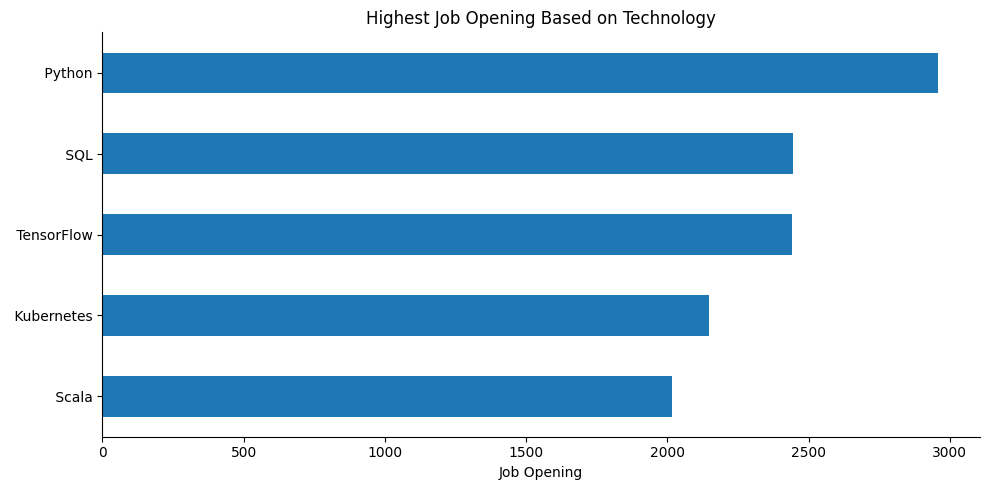

In [ ]:
# fig,ax=plt.subplots()
# ax.spines.right.set_visible(False)
# ax.spines.top.set_visible(False)
# df_da_pivoted.plot(kind='barh',figsize=(10,5),title='Highest Job Opening Based on Technology',xlabel='Job Opening',ylabel='')
# # plt.invert_yaxis()
# plt.tight_layout()
# plt.gca().invert_yaxis()
# plt.show()

In [ ]:
# df['salary_usd'].sort_values(ascending=False).head()
df['job_title'].value_counts().head()

,count
job_title,
Machine Learning Researcher,808
AI Software Engineer,784
Autonomous Systems Engineer,777
Machine Learning Engineer,772
AI Architect,771


In [ ]:
df_data=df[df['job_title']=='Data Analyst']

In [ ]:
# df_pivoted_da=df_data.pivot_table(index='job_title',values='salary_usd',aggfunc='size')

df_DA_top_pay= df.groupby('job_title')['salary_usd'].agg(['median','count']).sort_values(by='median',ascending=True)
df_DA_top_pay.head()


,median,count
job_title,,
Data Analyst,96074.0,759
Machine Learning Researcher,96206.5,808
Computer Vision Engineer,96679.0,724
Autonomous Systems Engineer,97415.0,777
NLP Engineer,97559.5,762


In [ ]:
df_da_highest=df[df['job_title']=='Data Analyst'].sort_values(by='salary_usd',ascending=False).head()
df_da_highest

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
1415,AI01416,Data Analyst,361541,USD,EX,CT,Denmark,L,Denmark,0,"[Python, Azure, R]",Master,13,Retail,2024-08-17,2024-10-07,2007,7.5,Algorithmic Solutions
918,AI00919,Data Analyst,349508,USD,EX,FT,Norway,L,South Korea,0,"[Java, SQL, R, Spark]",PhD,10,Consulting,2024-03-06,2024-03-27,2055,6.0,Smart Analytics
11291,AI11292,Data Analyst,344471,USD,EX,CT,United States,L,United States,50,"[AWS, Hadoop, Git, SQL]",Bachelor,15,Retail,2024-09-10,2024-09-25,823,8.1,Autonomous Tech
12826,AI12827,Data Analyst,339576,USD,EX,CT,Norway,L,Japan,0,"[Statistics, SQL, Deep Learning]",Associate,11,Technology,2025-03-21,2025-05-28,1658,5.6,DataVision Ltd
4304,AI04305,Data Analyst,336904,USD,EX,CT,United States,L,United States,0,"[Python, TensorFlow, Data Visualization, Py...",Master,16,Automotive,2024-03-02,2024-04-27,2075,8.3,Predictive Systems


In [ ]:
da_high=df_da_highest.pivot_table(index='company_name',values='salary_usd',aggfunc='median').sort_values(by='salary_usd',ascending=False)
da_high

,salary_usd
company_name,
Algorithmic Solutions,361541.0
Smart Analytics,349508.0
Autonomous Tech,344471.0
DataVision Ltd,339576.0
Predictive Systems,336904.0


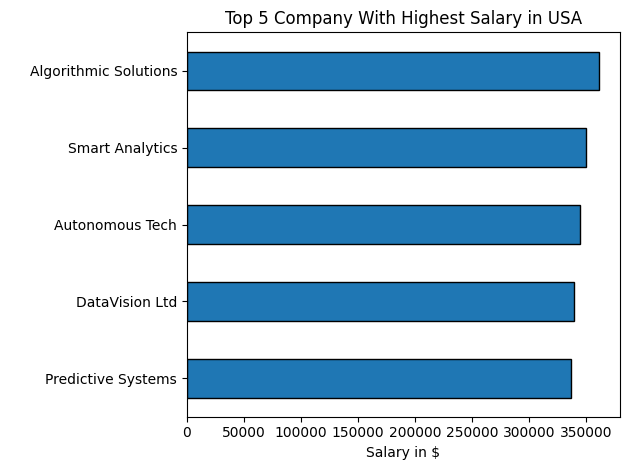

In [ ]:
da_high.plot(kind='barh',edgecolor='black')
plt.title('Top 5 Company With Highest Salary in USA')
plt.xlabel(f'Salary in $')
plt.ylabel(' ')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.legend().set_visible(False)
plt.show()

In [ ]:
df['company_location'].value_counts(ascending=False).head()

,count
company_location,
Germany,814
Denmark,778
Canada,769
France,769
Austria,765


In [ ]:
df_country_job=df.groupby('company_location')['salary_usd'].agg(['count','median']).head().sort_values(by='count',ascending=False)
df_country_job

,count,median
company_location,,
Denmark,778,147504.5
Canada,769,100392.0
Austria,765,74005.0
China,763,76543.0
Australia,732,103205.5


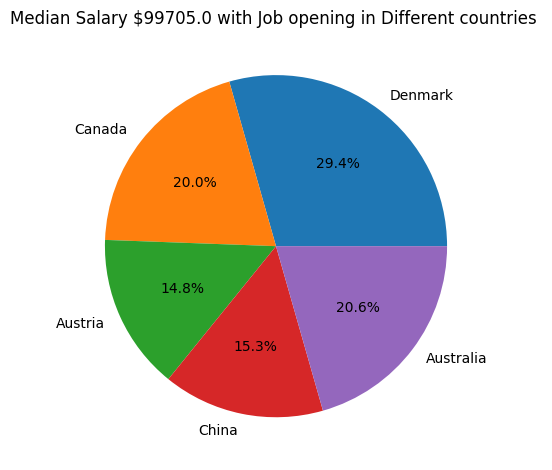

In [ ]:
df_country_job.plot(kind='pie',x='count',y='median',autopct='%1.1f%%')
plt.legend().set_visible(False)
plt.ylabel('')
plt.title(f"Median Salary ${df_median} with Job opening in Different countries ")
plt.tight_layout()
plt.show()